In [3]:
import pandas as pd #importing required libraries

In [152]:
#load expression data (proteomic data)
expression_data = pd.read_csv("~/Desktop/2/protein_data.csv")
#load clinical data for breast cancer
clinical_data = pd.read_csv("~/Desktop/2/clinical_data.csv")
#load PAM50 proteins list
PAM50_proteins = pd.read_csv("~/Desktop/2/PAM50_proteins.csv")


In [153]:
PAM50_proteins

,GeneSymbol,RefSeqProteinID,Species,Gene Name
0,MIA,NP_006524,Homo sapiens,melanoma inhibitory activity
1,FGFR4,NP_002002,Homo sapiens,fibroblast growth factor receptor 4
2,FGFR4,NP_998812,Homo sapiens,fibroblast growth factor receptor 4
3,FGFR4,NP_075252,Homo sapiens,fibroblast growth factor receptor 4
4,GPR160,NP_055188,Homo sapiens,G protein-coupled receptor 160
...,...,...,...,...
95,FOXC1,NP_001444,Homo sapiens,forkhead box C1
96,GRB7,NP_001025173,Homo sapiens,growth factor receptor-bound protein 7
97,GRB7,NP_005301,Homo sapiens,growth factor receptor-bound protein 7
98,MELK,NP_055606,Homo sapiens,maternal embryonic leucine zipper kinase


In [154]:
clinical_data.set_index(clinical_data.columns[0], inplace=True) #setting the index as the first column (samples names)
expression_data.set_index(expression_data.columns[0], inplace=True)

In [155]:
# extract the core part of the ID from expression_data (assuming row names are the IDs)
expression_data['core_id'] = expression_data.index.str.split('-').str[-1]  # Extract core ID from expression_data row names

# set the row names of expression_data to be the core IDs
expression_data.set_index('core_id', inplace=True)
expression_data = expression_data.apply(pd.to_numeric, errors='coerce')
expression_data = expression_data.dropna()


# extract the core part of the ID from clinical_data (row names)
clinical_data['core_id'] = clinical_data.index.str.split('-').str[-1]  # Extract core ID from clinical_data row names

# Set the row names of clinical_data to be the core IDs
clinical_data.set_index('core_id', inplace=True) #this is to make the sample IDs the same

In [156]:
expression_data

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001652,NP_071753,NP_001294,NP_065775,NP_001094348,XP_003846524,NP_443073,NP_001004456,NP_997625,NP_003270
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,0.762044,0.762044,0.766384,0.757704,0.766384,0.762044,0.762044,0.762044,-0.583338,2.185546,...,-0.999973,0.228231,2.541421,-0.561638,0.466928,-3.521480,0.566747,1.339257,-1.182250,1.577954
A0TX,-0.583429,-0.572549,-0.567109,-0.583429,-0.572549,-0.577989,-0.577989,-0.577989,0.730304,1.638765,...,0.610626,-0.373993,0.267913,2.462907,-3.866400,-5.884597,-0.689506,2.737621,-1.540848,-2.683224
A0YD,0.063779,0.093336,0.084469,0.066734,0.084469,0.093336,0.084469,0.084469,-0.237711,1.305208,...,0.099248,-1.236767,-0.187463,1.509157,-3.557057,-4.822133,0.563306,1.435262,0.442119,-3.098911
A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.664094,1.181953,1.201633,-1.182832,2.480781,0.388225,0.371826,-1.445222,0.493181,2.369266
A18N,1.101261,1.101261,1.097767,1.090779,1.108248,1.101261,1.101261,1.101261,-3.444235,2.103995,...,1.338842,2.760838,-0.680602,-6.707488,1.793042,-0.456995,0.385022,1.510041,0.405985,0.636579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,0.578309,0.582213,0.578309,0.590021,0.586117,0.578309,0.582213,0.582213,-1.627551,-1.697826,...,1.222498,1.355240,0.453375,3.377603,0.543171,0.187891,1.417707,0.769613,0.176179,0.390908
A06N,0.238547,0.249818,0.244183,0.249818,0.249818,0.249818,0.244183,0.244183,-1.860681,-0.229200,...,-6.047867,-2.463681,0.841547,-1.869134,-2.582027,-0.136214,-2.939882,-2.759545,-7.197511,0.602038
A0YG,-0.078202,-0.068058,-0.071439,-0.057914,-0.064677,-0.068058,-0.071439,-0.071439,0.351214,-0.287838,...,0.097622,1.213427,-2.681748,-7.760353,4.080709,-2.566786,0.456032,-0.852503,1.210046,-3.672448


In [157]:
clinical_data

,Gender,Age at Initial Pathologic Diagnosis,ER Status,PR Status,HER2 Final Status,Tumor,Tumor--T1 Coded,Node,Node-Coded,Metastasis,...,PAM50 mRNA,SigClust Unsupervised mRNA,SigClust Intrinsic mRNA,miRNA Clusters,methylation Clusters,RPPA Clusters,CN Clusters,Integrated Clusters (with PAM50),Integrated Clusters (no exp),Integrated Clusters (unsup exp)
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,FEMALE,52,Positive,Positive,Negative,T2,T_Other,N1,Positive,M0,...,Luminal A,-3,-12,6,2,ReacII,2,3,3,3
A0TX,FEMALE,64,Positive,Positive,Positive,T1,T1,N1,Positive,M0,...,HER2-enriched,-5,-11,1,1,ReacII,1,1,2,2
A0YD,FEMALE,63,Positive,Positive,Negative,T3,T_Other,N0,Negative,M0,...,Luminal A,-7,-5,4,1,LumA,2,3,3,3
A130,FEMALE,52,Positive,Positive,Equivocal,T3,T_Other,N2,Positive,M0,...,HER2-enriched,0,-2,4,2,Her2,1,1,1,1
A18N,FEMALE,88,Positive,Positive,Negative,T2,T_Other,N1,Positive,M0,...,Luminal A,-3,-12,6,2,LumA,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,FEMALE,65,Positive,Positive,Negative,T2,T_Other,N0,Negative,M0,...,Luminal A,-3,-12,3,1,ReacII,3,3,2,2
A06N,FEMALE,66,Positive,Negative,Negative,T4,T_Other,N0,Negative,M0,...,Luminal B,-3,-10,2,4,LumA/B,3,4,1,3
A0YG,FEMALE,63,Positive,Positive,Positive,T2,T_Other,N3,Positive,M0,...,Luminal B,-5,-2,4,4,Her2,5,4,1,1


In [158]:
#this is to format the data in the same way as the expression and clinical data:
# Load the data 
phosphoproteome_data = pd.read_csv("~/Desktop/2/phospho_data.csv", header=None, low_memory=False)

# Drop the first two rows
phosphoproteome_data = phosphoproteome_data.drop([0, 1])

# Reset the index to ensure proper re-indexing
phosphoproteome_data.reset_index(drop=True, inplace=True)

# Set the third row (which is now the first row after dropping) as column names
phosphoproteome_data.columns = phosphoproteome_data.iloc[0]

# Drop the first row (which is now used as column names)
phosphoproteome_data = phosphoproteome_data.drop([0])

# View the modified dataframe
#print(phosphoproteome_data.head())

In [159]:
# Extract the first 2 columns for phospho_metadata
phospho_metadata = phosphoproteome_data.iloc[:, :2]

# Extract the last 111 columns for phosphoproteome_data
phosphoproteome_data_only = phosphoproteome_data.iloc[:, -111:]

In [160]:
phospho_metadata

,Name,Description
1,NP_055955_S15s _1_0_15_16,NP_055955
2,NP_680780_T31t _1_0_31_32,NP_680780
3,NP_002511_S125s _1_1_125_125,NP_002511
4,NP_001116539_S84s _1_1_84_84,NP_001116539
5,NP_001135452_S299s _1_1_299_299,NP_001135452
...,...,...
33235,NP_006132_S381s_1_1_381_381,NP_006132
33236,XP_003846430_T124t _1_1_124_124,XP_003846430
33237,NP_056093_T286t _1_1_286_286,NP_056093
33238,NP_001191169_S504s _1_1_504_504,NP_001191169


In [161]:
phosphoproteome_data_only_T = phosphoproteome_data_only.T
phosphoproteome_data_only_T #transposing it so that the samples are the rows

,1,2,3,4,5,6,7,8,9,10,...,33230,33231,33232,33233,33234,33235,33236,33237,33238,33239
0,,,,,,,,,,,,,,,,,,,,,
AO-A12D.01TCGA,1.290593024,0.1619686121,-0.30288627,-1.885554985,-0.1126200857,-0.5753128521,-0.4628828341,1.811662915,1.470048629,0.2635880514,...,NaN,NaN,-0.4823418757,1.537074217,1.04411183,NaN,NaN,NaN,NaN,-0.05640507671
C8-A131.01TCGA,-0.1484804287,-0.1787291921,-1.855014835,-5.227751963,-0.5517972751,-0.03756829589,1.280773646,1.890790376,0.8472080359,-0.04513048676,...,NaN,NaN,-2.228082918,1.079115223,-0.07537925024,NaN,NaN,NaN,NaN,-1.577734503
AO-A12B.01TCGA,2.360191472,0.0159091137,1.036382062,1.022354943,0.9311786657,0.7400591615,-0.7766231421,1.060929522,0.9820269741,-0.4136714232,...,NaN,NaN,-1.093986722,2.051594841,1.273089705,NaN,NaN,NaN,NaN,-0.155923101
E2-A10A.02TCGA,-2.092410459,1.274306741,0.3664279457,-1.952610282,2.527574209,0.3795856094,-6.510096046,0.2397854326,-1.279924725,0.02432868947,...,-8.065989779,-1.931229078,NaN,NaN,NaN,NaN,NaN,NaN,0.706882494,0.2480089724
BH-A18Q.02TCGA,-0.8289945134,0.3948329348,-0.6853717881,-3.7702261,-0.7561717231,-0.2949607178,-2.117553331,-0.3981263374,-0.903840159,-1.361005454,...,-5.564498739,-1.363028309,NaN,NaN,NaN,NaN,NaN,NaN,0.9875295337,-1.128377096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BH-A0C7.36TCGA,-2.639905541,0.907178664,-0.692258084,2.085097186,-1.475315659,0.7755583482,0.08413517074,-0.1341213022,-0.7738960013,-0.3590420948,...,NaN,NaN,NaN,-3.059757687,NaN,NaN,NaN,-0.2557451382,NaN,NaN
A2-A0SX.36TCGA,-4.789342009,0.2042573418,-0.9525764958,-2.89998017,-2.801909482,0.2963237026,4.795566725,-0.5202648887,-0.6463557741,-1.402901087,...,NaN,NaN,NaN,-0.4442100689,NaN,NaN,NaN,-0.4982490198,NaN,NaN
263d3f-I.CPTAC,-0.4092853305,-0.7546872251,-0.5380446167,0.254949082,-0.3070954209,-1.302425141,-0.4746868727,-2.213959135,-1.353520095,-1.177753451,...,-1.705053385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [151]:

import pandas as pd

#extract the core part of the IDs from expression_data (row names are core IDs)
expression_data['core_id'] = expression_data.index.str.split('-').str[-1]  # Extract core ID from row names (expression_data)

#Extract the core part of the IDs from phosphoproteome_data_only_T (row names)
phospho_core_ids = phosphoproteome_data_only_T.index.str.split('.').str[0].str.split('-').str[-1]

#Match the core_ids from phosphoproteome_data_only_T with those in expression_data
matching_core_ids = phospho_core_ids.isin(expression_data['core_id'])

#Filter phosphoproteome_data_only_T to retain only the rows that match the core IDs from expression_data
phosphoproteome_data_filtered = phosphoproteome_data_only_T[matching_core_ids]

#replacing row names with core ID
phosphoproteome_data_filtered.index = phospho_core_ids[matching_core_ids]

# View the filtered phosphoproteome data
phosphoproteome_data_filtered


AttributeError: Can only use .str accessor with string values!

In [162]:
phosphoproteome_data_filtered_ordered = phosphoproteome_data_filtered.reindex(clinical_data.index)
# Replace column names
phosphoproteome_data_filtered_ordered.columns = phospho_metadata['Name'].values

phosphoproteome_data_filtered_ordered #making sure that they are in the same order as the clinical data
#as well as the expression data

,NP_055955_S15s _1_0_15_16,NP_680780_T31t _1_0_31_32,NP_002511_S125s _1_1_125_125,NP_001116539_S84s _1_1_84_84,NP_001135452_S299s _1_1_299_299,NP_004454_S48s _1_0_48_50,NP_056425_S413s _1_0_412_415,NP_002826_S673s _1_1_673_673,NP_001348_S87s _1_1_87_87,NP_004517_S40s _1_0_39_41,...,NP_001035375_S7s _1_1_7_7,NP_054828_T1152tS1157s_2_1_1152_1158,NP_955352_S547sS549sS550s_3_0_547_561,NP_891988_Y387yS390s_2_2_387_390,NP_055885_S356s _1_1_356_356,NP_006132_S381s_1_1_381_381,XP_003846430_T124t _1_1_124_124,NP_056093_T286t _1_1_286_286,NP_001191169_S504s _1_1_504_504,NP_036441_S1763sS1774s_2_2_1763_1774
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,-0.7975038236,0.6083768984,-0.4609134026,-1.049946639,-1.98377982,-0.405499126,0.3128340896,0.7335721159,-1.567146555,-0.2351515348,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A0TX,-0.3367290526,0.3681990064,-0.7134674643,NaN,-2.045645559,NaN,-0.2318637215,-0.3716841629,-0.8086230425,-2.41850007,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1720619983,NaN
A0YD,-0.8745693275,0.7487467224,-1.15193448,-0.2964819572,-0.5212937123,0.1239452212,-2.176725727,-1.149014847,-0.5212937123,-2.077458199,...,NaN,NaN,NaN,NaN,-4.746002928,-5.008769915,NaN,NaN,NaN,-0.7431858342
A130,2.822363487,-0.8940241312,-0.3616834704,0.1456646711,-1.956206201,0.4980591931,-0.8190465734,-0.4391602802,1.722692638,0.8579514708,...,2.117574443,-0.7740600386,NaN,NaN,NaN,NaN,NaN,NaN,0.2706272676,0.5230517124
A18N,-1.917991332,-0.2188813123,0.3879436947,1.867341212,-1.445086327,-0.3841888143,-0.7482838185,-0.4344088148,-1.183523824,-1.924268832,...,NaN,NaN,0.4862911958,NaN,NaN,-0.1330888113,0.1284736917,NaN,1.247961205,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,1.327279723,0.4488972646,-0.1929976089,0.1544943527,-1.061727513,0.8012155035,-0.1326691433,-0.4005275304,1.17525199,-0.1881713316,...,NaN,NaN,NaN,NaN,NaN,NaN,-0.1833450544,NaN,NaN,NaN
A06N,-1.490900505,0.6952684252,-0.08292748766,0.3382610219,-0.8831856558,0.07953093744,0.4325270216,-0.05284259412,0.3442780006,-1.28231191,...,NaN,0.7754948079,0.2600402987,NaN,NaN,NaN,NaN,0.4686288939,NaN,NaN
A0YG,-9.519018904,-0.3798179118,-0.01641299658,-1.20180522,0.08741697919,-0.1440373418,0.3275237982,-0.04453361502,-0.3625129158,-0.524747253,...,NaN,NaN,-0.5982934858,NaN,NaN,1.456674785,-0.2197466991,NaN,1.181957974,NaN


Now, we have phospho data for all the samples that are present in the expression dataset as well as the clinical dataset. They're named in the same way and also ordered in the same way. 

In [143]:
#loading the necessary libraries to implement ML models like sci-kit
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

common_samples = expression_data.index.intersection(clinical_data.index)
X = expression_data.loc[common_samples]
y = clinical_data.loc[common_samples, 'PAM50 mRNA'] #grabbing only the tumor classifications

In [58]:
X = X.drop(X.columns[-1], axis=1)
X

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001652,NP_071753,NP_001294,NP_065775,NP_001094348,XP_003846524,NP_443073,NP_001004456,NP_997625,NP_003270
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,0.762044,0.762044,0.766384,0.757704,0.766384,0.762044,0.762044,0.762044,-0.583338,2.185546,...,-0.999973,0.228231,2.541421,-0.561638,0.466928,-3.521480,0.566747,1.339257,-1.182250,1.577954
A0TX,-0.583429,-0.572549,-0.567109,-0.583429,-0.572549,-0.577989,-0.577989,-0.577989,0.730304,1.638765,...,0.610626,-0.373993,0.267913,2.462907,-3.866400,-5.884597,-0.689506,2.737621,-1.540848,-2.683224
A0YD,0.063779,0.093336,0.084469,0.066734,0.084469,0.093336,0.084469,0.084469,-0.237711,1.305208,...,0.099248,-1.236767,-0.187463,1.509157,-3.557057,-4.822133,0.563306,1.435262,0.442119,-3.098911
A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.664094,1.181953,1.201633,-1.182832,2.480781,0.388225,0.371826,-1.445222,0.493181,2.369266
A18N,1.101261,1.101261,1.097767,1.090779,1.108248,1.101261,1.101261,1.101261,-3.444235,2.103995,...,1.338842,2.760838,-0.680602,-6.707488,1.793042,-0.456995,0.385022,1.510041,0.405985,0.636579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,0.578309,0.582213,0.578309,0.590021,0.586117,0.578309,0.582213,0.582213,-1.627551,-1.697826,...,1.222498,1.355240,0.453375,3.377603,0.543171,0.187891,1.417707,0.769613,0.176179,0.390908
A06N,0.238547,0.249818,0.244183,0.249818,0.249818,0.249818,0.244183,0.244183,-1.860681,-0.229200,...,-6.047867,-2.463681,0.841547,-1.869134,-2.582027,-0.136214,-2.939882,-2.759545,-7.197511,0.602038
A0YG,-0.078202,-0.068058,-0.071439,-0.057914,-0.064677,-0.068058,-0.071439,-0.071439,0.351214,-0.287838,...,0.097622,1.213427,-2.681748,-7.760353,4.080709,-2.566786,0.456032,-0.852503,1.210046,-3.672448


In [62]:
y

core_id
A0E1        Luminal A
A0TX    HER2-enriched
A0YD        Luminal A
A130    HER2-enriched
A18N        Luminal A
            ...      
A1AW        Luminal A
A06N        Luminal B
A0YG        Luminal B
A0J9        Luminal A
A03O        Luminal B
Name: PAM50 mRNA, Length: 74, dtype: object

In [59]:
#encodeing the labels (since they have to be numbered
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#X_numeric = X.apply(pd.to_numeric, errors='coerce')  # Convert all data to numeric, invalid entries will become NaN
X_numeric = X_numeric.dropna(axis=1)  # Remove columns with NaN values, if any

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

#rain-Test Split (e.g. 80% train, 20% test) ---
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

In [60]:
y_encoded

array([2, 1, 2, 1, 2, 3, 1, 3, 3, 3, 3, 0, 0, 3, 3, 2, 0, 3, 2, 2, 0, 3,
       0, 1, 2, 3, 1, 2, 0, 3, 2, 0, 0, 3, 0, 2, 2, 1, 1, 2, 0, 0, 3, 0,
       0, 2, 2, 0, 1, 0, 2, 2, 2, 0, 3, 3, 2, 3, 2, 1, 3, 2, 0, 3, 2, 1,
       1, 3, 3, 2, 3, 3, 2, 3])

In [63]:
X_numeric

,NP_958782,NP_958785,NP_958786,NP_000436,NP_958781,NP_958780,NP_958783,NP_958784,NP_112598,NP_001611,...,NP_001652,NP_071753,NP_001294,NP_065775,NP_001094348,XP_003846524,NP_443073,NP_001004456,NP_997625,NP_003270
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,0.762044,0.762044,0.766384,0.757704,0.766384,0.762044,0.762044,0.762044,-0.583338,2.185546,...,-0.999973,0.228231,2.541421,-0.561638,0.466928,-3.521480,0.566747,1.339257,-1.182250,1.577954
A0TX,-0.583429,-0.572549,-0.567109,-0.583429,-0.572549,-0.577989,-0.577989,-0.577989,0.730304,1.638765,...,0.610626,-0.373993,0.267913,2.462907,-3.866400,-5.884597,-0.689506,2.737621,-1.540848,-2.683224
A0YD,0.063779,0.093336,0.084469,0.066734,0.084469,0.093336,0.084469,0.084469,-0.237711,1.305208,...,0.099248,-1.236767,-0.187463,1.509157,-3.557057,-4.822133,0.563306,1.435262,0.442119,-3.098911
A130,-0.494060,-0.503899,-0.500619,-0.510459,-0.503899,-0.503899,-0.500619,-0.500619,-1.845366,-0.405503,...,1.664094,1.181953,1.201633,-1.182832,2.480781,0.388225,0.371826,-1.445222,0.493181,2.369266
A18N,1.101261,1.101261,1.097767,1.090779,1.108248,1.101261,1.101261,1.101261,-3.444235,2.103995,...,1.338842,2.760838,-0.680602,-6.707488,1.793042,-0.456995,0.385022,1.510041,0.405985,0.636579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,0.578309,0.582213,0.578309,0.590021,0.586117,0.578309,0.582213,0.582213,-1.627551,-1.697826,...,1.222498,1.355240,0.453375,3.377603,0.543171,0.187891,1.417707,0.769613,0.176179,0.390908
A06N,0.238547,0.249818,0.244183,0.249818,0.249818,0.249818,0.244183,0.244183,-1.860681,-0.229200,...,-6.047867,-2.463681,0.841547,-1.869134,-2.582027,-0.136214,-2.939882,-2.759545,-7.197511,0.602038
A0YG,-0.078202,-0.068058,-0.071439,-0.057914,-0.064677,-0.068058,-0.071439,-0.071439,0.351214,-0.287838,...,0.097622,1.213427,-2.681748,-7.760353,4.080709,-2.566786,0.456032,-0.852503,1.210046,-3.672448


In [64]:
#Set up Random Forest with Grid Search and 2-fold CV ---
param_grid = {
    'n_estimators': [300, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [3, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid, #this will test the hyperparamaters
    cv=3,  # 3-fold CV on training set
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train, y_train)

#Evaluate on Test Set ---
print("Best Parameters:", grid_search.best_params_)
print("Best Training CV Accuracy:", grid_search.best_score_)
best_rfc_model = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 500}
Best Training CV Accuracy: 0.6929824561403509


The testing accuracy on the training data about 69%. I'm going to now test the model with its best parameters on the testing data.

In [65]:
y_test_pred = best_rfc_model.predict(X_test) #predicting using the best model identified above
print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report on Test Set:
               precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.60      0.60      0.60         5
    Luminal B       0.57      0.80      0.67         5

     accuracy                           0.67        15
    macro avg       0.54      0.60      0.57        15
 weighted avg       0.59      0.67      0.62        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

HER2-enriched had the worst performance, with 0/2 cases being predicted accurately based on the protein expression data. Our sample sizes in the testing dataset are really small to make any hard conclusions, but it would be interesting to see why HER2-enriched cancer has the worst performance.

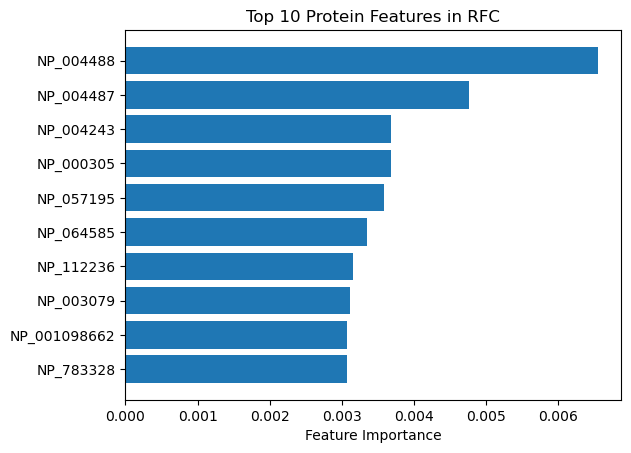

In [144]:
#here, I'll extract the important features/proteins that are key in making the classifications. 
import matplotlib.pyplot as plt
import numpy as np

importances = best_rfc_model.feature_importances_
top_idx = np.argsort(importances)[-10:]
plt.barh(range(10), importances[top_idx])
plt.yticks(range(10), X.columns[top_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Protein Features in RFC")
plt.show()

004488 = Hepatocyte nuclear factor 3-gamma

004487 = Hepatocyte nuclear factor 3-alpha

004243 = Na(+)/H(+) exchange regulatory cofactor NHE-RF1

000305 = Phosphatidylinositol 3,4,5-trisphosphate 3-phosphatase and dual-specificity protein phosphatase PTEN

057195 = Telomere length regulation protein TEL2 homolog

064585 = Phosphoribosyltransferase domain-containing protein 1

112236 = Sharpin (involved in the NF-Kappa beta activation) --- CYLD is also in this pathway ***

003079 = Fascin

001098662 = Transducin-like enhancer protein 3

783328 = DNA (cytosine-5)-methyltransferase 3A

In [69]:
#now, I will implement XGB:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softprob', num_class=4, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_xgb = GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("Best params:", grid_xgb.best_params_)
print("Train accuracy:", grid_xgb.best_score_)
best_xgb_model = grid_xgb.best_estimator_

Best params: {'learning_rate': 0.1, 'max_depth': None, 'n_estimators': 100}
Train accuracy: 0.5912280701754385


In [70]:
y_pred = best_xgb_model.predict(X_test)
print("Test set performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test set performance:
               precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.50      0.50      0.50         2
    Luminal A       0.75      0.60      0.67         5
    Luminal B       0.50      0.60      0.55         5

     accuracy                           0.67        15
    macro avg       0.69      0.68      0.68        15
 weighted avg       0.68      0.67      0.67        15



next up is SVM:

In [71]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'] #testing gamma as well as regularization strength in SVM
}

grid_svm = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best params:", grid_svm.best_params_)
print("Train accuracy:", grid_svm.best_score_)
best_svm_model = grid_svm.best_estimator_

Best params: {'C': 10, 'gamma': 'scale'}
Train accuracy: 0.6412280701754386


In [72]:
y_pred = best_svm_model.predict(X_test)
print("Test set performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test set performance:
               precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.60      0.60      0.60         5
    Luminal B       0.57      0.80      0.67         5

     accuracy                           0.67        15
    macro avg       0.54      0.60      0.57        15
 weighted avg       0.59      0.67      0.62        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [79]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

y_categorical = to_categorical(y_encoded)  #for softmax -- this is a prereq for neural network

In [80]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_categorical, test_size=0.2, random_state=42, stratify=y_encoded
) #doing it again since we converted it to categorical.

In [81]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'), #2 differeny input, processing layers
    Dense(y_categorical.shape[1], activation='softmax')  #output layer
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100


/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.3165 - loss: 1.8966 - val_accuracy: 0.5000 - val_loss: 2.0496
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7239 - loss: 0.6510 - val_accuracy: 0.4167 - val_loss: 5.1673
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8893 - loss: 0.3055 - val_accuracy: 0.4167 - val_loss: 6.9718
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9212 - loss: 0.3539 - val_accuracy: 0.2500 - val_loss: 8.3388
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9262 - loss: 0.3454 - val_accuracy: 0.2500 - val_loss: 9.7321
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 1.0000 - loss: 0.0264 - val_accuracy: 0.2500 - val_loss: 10.8776
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 1.0000 - loss: 0.0328 - val_accuracy: 0.2500 - val_loss: 11.8297
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9318 - loss: 0.5512 - val_accuracy: 0.3333 - val_loss: 12.3007
E

In [82]:
# Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")

#classification report
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_test_pred_labels, target_names=label_encoder.classes_))


Test Accuracy: 0.47
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

Classification Report:
               precision    recall  f1-score   support

   Basal-like       0.50      0.33      0.40         3
HER2-enriched       0.25      0.50      0.33         2
    Luminal A       0.75      0.60      0.67         5
    Luminal B       0.40      0.40      0.40         5

     accuracy                           0.47        15
    macro avg       0.47      0.46      0.45        15
 weighted avg       0.52      0.47      0.48        15



as we can see from the code block above, the training data accuracy is really high (95% after 10 epochs), but the testing accuracy is much lower at 47%. This could mean that the model is 'memorizing' the training data, but is failing to accurately predict the tumor subtypes in the testing dataset. To fix this, I'm going to change the code a little bit. 

In [85]:
from tensorflow.keras.regularizers import l2 #adding L2 regularization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(y_categorical.shape[1], activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Step 4: Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4471 - loss: 2.1256 - val_accuracy: 0.5000 - val_loss: 2.5592
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7395 - loss: 1.1917 - val_accuracy: 0.4167 - val_loss: 4.3479
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6820 - loss: 1.3179 - val_accuracy: 0.4167 - val_loss: 4.9912
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7580 - loss: 1.9148 - val_accuracy: 0.4167 - val_loss: 5.7886
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8368 - loss: 1.0607 - val_accuracy: 0.5000 - val_loss: 6.4885
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7480 - loss: 1.6935 - val_accuracy: 0.5833 - val_loss: 6.8506
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8609 - loss: 0.9129 - val_accuracy: 0.5000 - val_loss: 7.2329
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9368 - loss: 0.5284 - val_accuracy: 0.5000 - val_loss: 7.7953
Epoc

In [86]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")

# Predict and classify
y_test_pred = model.predict(X_test)
y_test_pred_labels = np.argmax(y_test_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

print("\nClassification Report:")
print(classification_report(y_true_labels, y_test_pred_labels, target_names=label_encoder.classes_))


Test Accuracy: 0.47
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step

Classification Report:
               precision    recall  f1-score   support

   Basal-like       0.43      1.00      0.60         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.67      0.80      0.73         5
    Luminal B       0.00      0.00      0.00         5

     accuracy                           0.47        15
    macro avg       0.27      0.45      0.33        15
 weighted avg       0.31      0.47      0.36        15



**bit better but still sucks**

**using the phosphoproteomics data with the same 4 models below**

In [89]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Align X and y
X_df = phosphoproteome_data_filtered_ordered.copy()
y = clinical_data["PAM50 mRNA"].loc[X_df.index].values

# Convert all values to numeric (if not already)
X_df = X_df.apply(pd.to_numeric, errors='coerce')  # ensures any string numbers are converted

#Impute NaNs using median - we had to do this since there are a lot of NaN in the phospho data
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X_df)

#  Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

#  Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [127]:
#  Define RFC and hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rfc = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=2,
    n_jobs=-1,
    scoring='accuracy',
    verbose=1
)

#  Fit and evaluate
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)
best_rfc_phospho_model = grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Accuracy: 0.4925287356321839


In [128]:
y_test_pred = best_rfc_phospho_model.predict(X_test)

print("\nClassification Report on Test Set:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Classification Report on Test Set:
               precision    recall  f1-score   support

   Basal-like       0.67      0.67      0.67         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.67      0.80      0.73         5
    Luminal B       0.50      0.60      0.55         5

     accuracy                           0.60        15
    macro avg       0.46      0.52      0.48        15
 weighted avg       0.52      0.60      0.56        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

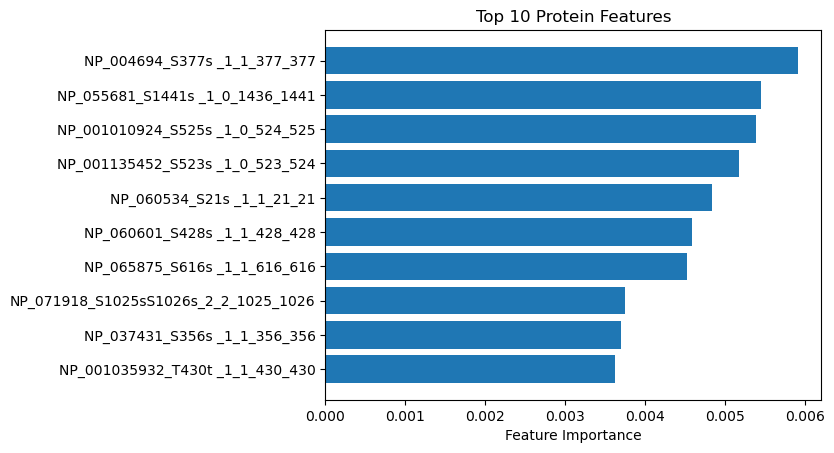

In [129]:
#here, I'll extract the important features/proteins that are key in making the classifications. 
import matplotlib.pyplot as plt
import numpy as np

importances = best_rfc_phospho_model.feature_importances_
top_idx = np.argsort(importances)[-10:]
plt.barh(range(10), importances[top_idx])
plt.yticks(range(10), phosphoproteome_data_filtered_ordered.columns[top_idx])
plt.xlabel("Feature Importance")
plt.title("Top 10 Protein Features")
plt.show()

**need to redo this whole thing**

001135452 = TP53-binding protein 1 ***

004487 = Hepatocyte nuclear factor 3-alpha ***

000215 = Keratin, type I cytoskeletal 18

001138926 = Stathmin (related to microtubules) 

060484 = B-cell lymphoma/leukemia 11A

003119 = Spectrin beta chain, non-erythrocytic 1 (related to cytoskeleton)

005906 = DNA replication licensing factor MCM6

001243804 = Borealin (regulator of mitosis)

004694 = Rab GTPase-binding effector protein 1

001611 = Neuroblast differentiation-associated protein AHNAK

In [130]:
#now, I will implement XGB:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective='multi:softprob', num_class=4, eval_metric='mlogloss', random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 3, 6],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid = GridSearchCV(xgb, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Train accuracy:", grid.best_score_)
best_xgb_phospho_model = grid.best_estimator_

/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best params: {'learning_rate': 0.2, 'max_depth': None, 'n_estimators': 100}
Train accuracy: 0.5236842105263158


In [131]:
y_pred = best_xgb_phospho_model.predict(X_test)
print("Test set performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test set performance:
               precision    recall  f1-score   support

   Basal-like       1.00      0.67      0.80         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.50      0.60      0.55         5
    Luminal B       0.43      0.60      0.50         5

     accuracy                           0.53        15
    macro avg       0.48      0.47      0.46        15
 weighted avg       0.51      0.53      0.51        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [132]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', probability=True)
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm, param_grid, cv=3, n_jobs=-1, scoring='accuracy')
grid.fit(X_train, y_train)

print("Best params:", grid.best_params_)
print("Train accuracy:", grid.best_score_)
best_svm_phospho_model = grid.best_estimator_

Best params: {'C': 10, 'gamma': 'scale'}
Train accuracy: 0.5403508771929825


now, I will only use the PAM50 protein list to subset my protein expression as well as the phosphosite dataset to see if the models perform more accurately with that subset of the data. 

In [133]:
y_pred = best_svm_phospho_model.predict(X_test)
print("Test set performance:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

Test set performance:
               precision    recall  f1-score   support

   Basal-like       0.75      1.00      0.86         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.60      0.60      0.60         5
    Luminal B       0.50      0.60      0.55         5

     accuracy                           0.60        15
    macro avg       0.46      0.55      0.50        15
 weighted avg       0.52      0.60      0.55        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

#  One-hot encode y labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

#  Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Train with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.2661 - loss: 3.1961 - val_accuracy: 0.3333 - val_loss: 9.5773
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6232 - loss: 4.9002 - val_accuracy: 0.4167 - val_loss: 12.6987
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7389 - loss: 3.8915 - val_accuracy: 0.4167 - val_loss: 15.0300
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7864 - loss: 2.2030 - val_accuracy: 0.4167 - val_loss: 17.2169
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7367 - loss: 3.9428 - val_accuracy: 0.4167 - val_loss: 19.1908
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6927 - loss: 4.1832 - val_accuracy: 0.4167 - val_loss: 21.0760
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7949 - loss: 3.8351 - val_accuracy: 0.4167 - val_loss: 22.6442
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9156 - loss: 1.3140 - val_accuracy: 0.4167 - val_loss: 23.51

In [91]:
#  Evaluate on test set
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")

#  Classification report
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Test Accuracy: 0.40
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step

Classification Report:
               precision    recall  f1-score   support

   Basal-like       1.00      0.33      0.50         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.40      0.40      0.40         5
    Luminal B       0.50      0.60      0.55         5

     accuracy                           0.40        15
    macro avg       0.47      0.33      0.36        15
 weighted avg       0.50      0.40      0.42        15



using the PAM50 proteins below:

In [92]:
# Load expression data (proteomic data)
expression_data = pd.read_csv("~/Desktop/2/protein_data.csv")
# Load clinical data for breast cancer
clinical_data = pd.read_csv("~/Desktop/2/clinical_data.csv")
# Load PAM50 proteins list
PAM50_proteins = pd.read_csv("~/Desktop/2/PAM50_proteins.csv")

In [108]:
# Step 1: Get the list of RefSeq protein IDs
pam50_protein_ids = PAM50_proteins['RefSeqProteinID'].dropna().unique()

# Step 2: Filter expression_data columns
# (This assumes the column names in expression_data are RefSeqProteinIDs)
expression_data_PAM50 = expression_data.loc[:, expression_data.columns.isin(pam50_protein_ids)]

In [109]:
expression_data_PAM50

,NP_057427,NP_002408,NP_000415,NP_000413,NP_000517,NP_004439,NP_005219,NP_058519,NP_058518,NP_001116539,...,NP_006614,NP_001153651,NP_001159403,NP_000116,NP_004314,NP_005931,NP_003003,NP_004487,NP_008950,NP_054895
core_id,,,,,,,,,,,,,,,,,,,,,
A0E1,1.078860,-0.956573,-1.295089,-2.024200,-0.492199,-2.566693,-0.778636,-4.697605,-4.741004,-4.810443,...,0.853183,4.303439,1.235098,-2.831429,4.017002,-1.425287,5.779019,-0.249163,-0.053865,0.614486
A0TX,-1.388532,-2.653305,-4.445747,-3.118415,-2.857301,1.663244,-0.014961,-3.428489,-3.689603,-3.733122,...,3.529125,-1.233495,-1.535409,-3.629765,-0.047600,1.067577,2.250752,-0.888062,-1.940680,-2.851861
A0YD,-1.632842,-2.897917,-0.831824,-0.740195,0.119938,-4.431969,-3.698935,-2.336318,-2.776730,-2.584604,...,-1.822012,3.164396,-1.156960,-0.817045,0.114027,0.708139,1.999817,-0.556936,-0.630831,0.004663
A130,0.106156,1.883845,-2.639094,-1.976560,-1.579696,-2.960521,-2.422622,1.152435,1.149155,1.158994,...,-0.389104,-1.245150,0.040559,-1.953601,-1.681372,1.286909,-0.749889,1.113076,0.847407,1.923204
A18N,-0.649157,-3.465198,-3.507124,-6.389548,-3.884459,-1.606471,-1.092876,3.505027,3.539966,3.742609,...,-1.477199,-3.196172,-3.779644,3.417681,0.640073,-0.883245,-2.846787,2.306638,-2.983047,-4.104572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A1AW,-2.306877,-1.650976,-5.469260,-7.948412,-6.304754,-2.529415,-3.849027,3.584524,3.803158,3.611853,...,-3.638201,-1.323025,-1.576797,-0.534382,-2.455236,-4.063757,-4.809454,-0.428969,-1.857897,0.691530
A06N,-0.358817,0.269542,-3.695040,-3.438625,-3.427354,-1.209779,-3.385087,-2.331246,-2.243896,-2.331246,...,-4.233232,-1.401387,-0.936457,4.234125,-1.477466,-1.632443,-3.616143,1.785495,-2.038200,-1.945214
A0YG,0.090860,1.294577,-2.806853,-5.051989,-3.202457,5.767942,-0.247263,-3.303894,-3.303894,-3.527055,...,-0.095108,2.961523,2.183840,0.533801,-1.001277,-1.180482,1.152565,0.932786,0.834730,2.643687


In [110]:
#lots of missing proteins in the dataset that we have been provided with for assignment 5, which is what we used for our analysis:
print(f"Original number of proteins: {expression_data.shape[1]}")
print(f"Number of PAM50 proteins found: {expression_data_PAM50.shape[1]}")
print(f"Missing PAM50 proteins: {set(pam50_protein_ids) - set(expression_data.columns)}")

Original number of proteins: 7994
Number of PAM50 proteins found: 26
Missing PAM50 proteins: {'NP_113611', 'NP_001116214', 'NP_006870', 'NP_006869', 'NP_663735', 'NP_861518', 'NP_620143', 'NP_001025173', 'NP_000624', 'NP_075252', 'NP_001153643', 'NP_002002', 'NP_001012271', 'NP_006018', 'NP_001138808', 'NP_000648', 'NP_006524', 'NP_001035225', 'NP_057547', 'NP_001245', 'NP_001138812', 'NP_001153642', 'NP_861519', 'NP_958439', 'NP_060601', 'NP_055136', 'NP_001116212', 'NP_001159', 'NP_114172', 'NP_058525', 'NP_001025', 'NP_001153648', 'NP_001139438', 'NP_001784', 'NP_001120654', 'NP_476530', 'NP_001153647', 'NP_001005862', 'NP_001153645', 'NP_005901', 'NP_958441', 'NP_000653', 'NP_002458', 'NP_000703', 'NP_003677', 'NP_055188', 'NP_001092876', 'NP_002383', 'NP_958440', 'NP_861516', 'NP_055606', 'NP_001153646', 'NP_001116538', 'NP_001062', 'NP_001246', 'NP_002457', 'NP_001138809', 'NP_861517', 'NP_001116213', 'NP_569082', 'NP_001153644', 'NP_005301', 'NP_006092', 'NP_006598', 'NP_006873'

In [111]:
#doing the same thing for phosphodata:
phosphoproteome_data_filtered.columns = phospho_metadata['Description'].values
phospho_data_PAM50 = phosphoproteome_data_filtered.loc[:, phosphoproteome_data_filtered.columns.isin(pam50_protein_ids)]

In [112]:
#  Create a mapping from Description → Name
description_to_name = dict(zip(phospho_metadata['Description'], phospho_metadata['Name']))

# Rename columns in phospho_data_PAM50
phospho_data_PAM50 = phospho_data_PAM50.rename(columns=description_to_name)
phospho_data_PAM50

,NP_001116539_S68s _1_1_68_68,NP_058518_S55s _1_1_55_55,NP_004487_S307s _1_1_307_307,NP_004439_S1050sS1054sS1073s_3_0_1049_1073,NP_058519_S512sS515sS516s_3_3_512_516,NP_004439_S1050sS1054sS1073s_3_0_1049_1073,NP_000415_S353s _1_1_353_353,NP_058519_S512sS515sS516s_3_3_512_516,NP_001025_T379t _1_0_377_379,NP_000415_S353s _1_1_353_353,...,NP_000624_T69t _1_0_69_70,NP_002408_T2305t _1_1_2305_2305,NP_000415_S353s _1_1_353_353,NP_002408_T2305t _1_1_2305_2305,NP_002458_T358tS363s_2_1_358_363,NP_002457_T538t _1_1_538_538,NP_113611_S171s _1_1_171_171,NP_061155_S553s _1_1_553_553,NP_057547_S84s _1_0_83_95,NP_000415_S353s _1_1_353_353
0,,,,,,,,,,,,,,,,,,,,,
A18Q,-3.7702261,-5.354121789,-0.3495778106,-5.042602075,-1.992136303,-7.508462669,2.403528234,-3.404089293,-1.271999821,3.467550115,...,0.6274612927,NaN,0.7488326099,NaN,NaN,NaN,NaN,NaN,NaN,1.800717359
A130,0.1456646711,-0.4316625244,1.480265201,-2.880929415,2.522453255,-3.923117469,-3.158346379,1.417783903,0.1756556943,-1.056475507,...,-0.8290435811,NaN,0.3181130542,NaN,NaN,NaN,NaN,NaN,NaN,-2.461055091
A138,-4.022604349,-4.834190125,1.737036642,-0.9071621765,-3.234818743,-2.33517234,0.2019257169,-2.646954559,-1.766348291,-1.499786394,...,NaN,NaN,-0.1979171288,NaN,-0.9500024814,-0.5287394833,NaN,NaN,NaN,-2.18761129
A154,0.9038242965,0.7118499031,0.4634124527,-2.687226122,0.6056993561,-4.543731433,-2.05935693,0.5763385665,-2.364257437,-4.866700119,...,NaN,NaN,-0.5461470047,NaN,0.2443357919,-1.605393952,NaN,NaN,NaN,-4.50081951
A12L,-3.041421492,-5.481945257,0.6539815132,-0.9405805565,-2.173823948,-0.09461886148,0.3986784952,-3.705642056,0.6885988715,-0.8150926325,...,-1.18073848,NaN,NaN,-0.4256473508,1.162423964,NaN,1.856934716,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
A0JL,-2.417871857,-2.156173558,-3.078156793,-2.848667517,-0.2618804924,-3.009712623,-4.314177986,-1.646868409,1.807549127,-1.276464664,...,NaN,NaN,NaN,NaN,NaN,NaN,2.713427851,NaN,NaN,NaN
A0BV,-0.3655992367,-0.9729641871,-0.137085691,-2.358076995,0.1495584935,-4.677289033,-2.015306676,-1.70260393,1.248027117,4.367036565,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6506846902,NaN,NaN,NaN
A0YM,-2.089064059,-2.861318434,-3.456357719,-1.518517917,-1.178495468,-3.888589645,-0.888900078,-3.109131405,0.2089690144,-0.08494869536,...,NaN,NaN,0.3645725078,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Onto ML models with these new datasets:

In [137]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#  Prepare X and y ---
# Step 1: Prepare X and y (as DataFrames first)
X_df = expression_data_PAM50.loc[common_samples]
y_series = clinical_data.loc[common_samples, 'PAM50 mRNA']

# Drop rows with any NaNs in X and keep y aligned
X_df_clean = X_df.dropna()
y_clean = y_series.loc[X_df_clean.index]

# Convert to numpy arrays
X = X_df_clean.values.astype(np.float32)
y = y_clean.values

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale features (important for SVM/XGBoost)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)


In [138]:
param_grid_rfc = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

rfc = RandomForestClassifier(random_state=42)
grid_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rfc.fit(X_train, y_train)

print("RFC Best Params:", grid_rfc.best_params_)
print("Train accuracy:", grid_rfc.best_score_)
best_rcf_pam50 = grid_rfc.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
RFC Best Params: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Train accuracy: 0.7424242424242424


In [118]:
print("RFC Test Report:\n", classification_report(y_test, best_rcf_pam50.predict(X_test), target_names=label_encoder.classes_))

RFC Test Report:
                precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.60      0.60      0.60         5
    Luminal B       0.57      0.80      0.67         5

     accuracy                           0.67        15
    macro avg       0.54      0.60      0.57        15
 weighted avg       0.59      0.67      0.62        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

XGB next:

In [119]:
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2, 0.5]
}

xgb = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("XGBoost Best Params:", grid_xgb.best_params_)
print("Train accuracy:", grid_xgb.best_score_)
best_xgb_pam59 = grid_xgb.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBoost Best Params: {'learning_rate': 0.2, 'max_depth': 6, 'n_estimators': 100}
Train accuracy: 0.6909090909090909


In [120]:
print("XGBoost Test Report:\n", classification_report(y_test, best_xgb_pam59.predict(X_test), target_names=label_encoder.classes_))


XGBoost Test Report:
                precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.50      0.50      0.50         2
    Luminal A       0.67      0.40      0.50         5
    Luminal B       0.43      0.60      0.50         5

     accuracy                           0.60        15
    macro avg       0.65      0.62      0.62        15
 weighted avg       0.63      0.60      0.60        15



now SVM:

In [139]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=2, scoring='accuracy', n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("SVM Best Params:", grid_svm.best_params_)
print("Train accuracy:", grid_svm.best_score_)
best_svm_pam50 = grid_svm.best_estimator_


Fitting 2 folds for each of 12 candidates, totalling 24 fits
SVM Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Train accuracy: 0.7454022988505747


In [140]:
print("SVM Test Report:\n", classification_report(y_test, best_svm_pam50.predict(X_test), target_names=label_encoder.classes_))

SVM Test Report:
                precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       1.00      0.50      0.67         2
    Luminal A       0.80      0.80      0.80         5
    Luminal B       0.67      0.80      0.73         5

     accuracy                           0.80        15
    macro avg       0.87      0.77      0.80        15
 weighted avg       0.82      0.80      0.80        15



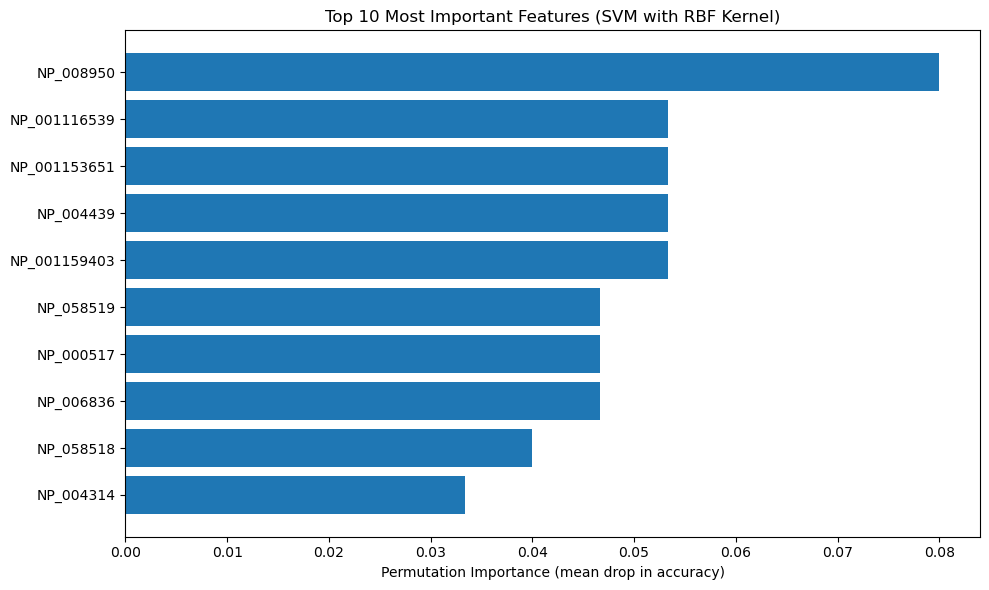

In [141]:
#since this gave such a high accuracy, I'm going to print out the best features to identify what are the driving proteins here:
#I will have to implement another method here called permutation importance 
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Run permutation importance on the test set
result = permutation_importance(
    best_svm_pam50, X_test, y_test, n_repeats=10,
    scoring='accuracy', random_state=42, n_jobs=-1
)

# Extract importance scores and feature names
importances = result.importances_mean
feature_names = expression_data_PAM50.columns

# Plot top N features
top_n = 10
top_idx = np.argsort(importances)[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[top_idx])
plt.yticks(range(top_n), feature_names[top_idx])
plt.xlabel("Permutation Importance (mean drop in accuracy)")
plt.title("Top 10 Most Important Features (SVM with RBF Kernel)")
plt.tight_layout()
plt.show()


008950 = Ubiquitin-conjugating enzyme E2 C 

001116539 = Microtubule-associated protein tau***

001153651 = Arylamine N-acetyltransferase 1

004439 = Receptor tyrosine-protein kinase erbB-2

001159403 = Ribonucleoside-diphosphate reductase subunit M2

058519 = Microtubule-associated protein tau***

000517 = Keratin, type I cytoskeletal 14

006836 = Kinesin-like protein KIF2C

058518 = Microtubule-associated protein tau***

004314 = BAG family molecular chaperone regulator 1

In [124]:
# One-hot encode the y labels for softmax classification
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

#  Build the DNN model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
    Dropout(0.4),
    Dense(y_train_cat.shape[1], activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#Train the model
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train_cat,
    validation_split=0.2,
    epochs=100,
    batch_size=16,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/100


/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.3577 - loss: 1.6707 - val_accuracy: 0.3333 - val_loss: 1.5879
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3499 - loss: 1.6417 - val_accuracy: 0.3333 - val_loss: 1.5313
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4081 - loss: 1.5449 - val_accuracy: 0.3333 - val_loss: 1.4898
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3981 - loss: 1.3429 - val_accuracy: 0.3333 - val_loss: 1.4591
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5160 - loss: 1.2083 - val_accuracy: 0.3333 - val_loss: 1.4334
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6182 - loss: 1.0553 - val_accuracy: 0.3333 - val_loss: 1.4146
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7367 - loss: 0.9315 - val_accuracy: 0.4167 - val_loss: 1.4011
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7424 - loss: 0.9139 - val_accuracy: 0.4167 - val_loss: 1.3914
Epoch 9/10

In [125]:
#  Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"\nTest Accuracy: {accuracy:.2f}")

#  Classification report
y_test_pred_prob = model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=label_encoder.classes_))


Test Accuracy: 0.67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step

Classification Report:
               precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.57      0.80      0.67         5
    Luminal B       0.60      0.60      0.60         5

     accuracy                           0.67        15
    macro avg       0.54      0.60      0.57        15
 weighted avg       0.59      0.67      0.62        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

now, I will do the same thing for phospho data:

In [126]:
X_df = phospho_data_PAM50.loc[common_samples]
y_series = clinical_data.loc[common_samples, 'PAM50 mRNA']

# Step 2: Convert all values to numeric (force conversion of strings to float, keep NaNs)
X_df = X_df.apply(pd.to_numeric, errors='coerce')

# Step 4: Impute missing values (use median or mean)
X_df_clean = X_df.fillna(X_df.median())

# Step 5: Align y
y_clean = y_series.loc[X_df_clean.index]

# Step 6: Convert to arrays for modeling
X = X_df_clean.values.astype(np.float32)
y = y_clean.values

In [127]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

In [128]:
#running RFC:
param_grid_rfc = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5]
}

rfc = RandomForestClassifier(random_state=42)
grid_rfc = GridSearchCV(rfc, param_grid_rfc, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_rfc.fit(X_train, y_train)

print("RFC Best Params:", grid_rfc.best_params_)
print("Train accuracy:", grid_rfc.best_score_)
phospho_rcf_pam50 = grid_rfc.best_estimator_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
RFC Best Params: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 500}
Train accuracy: 0.6409090909090909


In [129]:
print("RFC Test Report:\n", classification_report(y_test, phospho_rcf_pam50.predict(X_test), target_names=label_encoder.classes_))

RFC Test Report:
                precision    recall  f1-score   support

   Basal-like       0.75      1.00      0.86         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.67      0.40      0.50         5
    Luminal B       0.38      0.60      0.46         5

     accuracy                           0.53        15
    macro avg       0.45      0.50      0.45        15
 weighted avg       0.50      0.53      0.49        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [130]:
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.2, 0.5]
}

xgb = XGBClassifier(objective='multi:softmax', num_class=len(np.unique(y)), eval_metric='mlogloss', random_state=42)
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_xgb.fit(X_train, y_train)

print("XGBoost Best Params:", grid_xgb.best_params_)
print("Train accuracy:", grid_xgb.best_score_)
phospho_xgb_pam59 = grid_xgb.best_estimator_

Fitting 5 folds for each of 18 candidates, totalling 90 fits
XGBoost Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Train accuracy: 0.6060606060606061


In [131]:
print("XGBoost Test Report:\n", classification_report(y_test, phospho_xgb_pam59.predict(X_test), target_names=label_encoder.classes_))


XGBoost Test Report:
                precision    recall  f1-score   support

   Basal-like       0.75      1.00      0.86         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.50      0.20      0.29         5
    Luminal B       0.33      0.60      0.43         5

     accuracy                           0.47        15
    macro avg       0.40      0.45      0.39        15
 weighted avg       0.43      0.47      0.41        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [132]:
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

svm = SVC(probability=True)
grid_svm = GridSearchCV(svm, param_grid_svm, cv=2, scoring='accuracy', n_jobs=-1, verbose=1)
grid_svm.fit(X_train, y_train)

print("SVM Best Params:", grid_svm.best_params_)
print("Train accuracy:", grid_svm.best_score_)
phospho_svm_pam50 = grid_svm.best_estimator_


Fitting 2 folds for each of 12 candidates, totalling 24 fits
SVM Best Params: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Train accuracy: 0.5080459770114942


In [133]:
print("SVM Test Report:\n", classification_report(y_test, phospho_svm_pam50.predict(X_test), target_names=label_encoder.classes_))

SVM Test Report:
                precision    recall  f1-score   support

   Basal-like       1.00      1.00      1.00         3
HER2-enriched       0.00      0.00      0.00         2
    Luminal A       0.80      0.80      0.80         5
    Luminal B       0.57      0.80      0.67         5

     accuracy                           0.73        15
    macro avg       0.59      0.65      0.62        15
 weighted avg       0.66      0.73      0.69        15



/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/rahishah/miniconda3/envs/my_env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

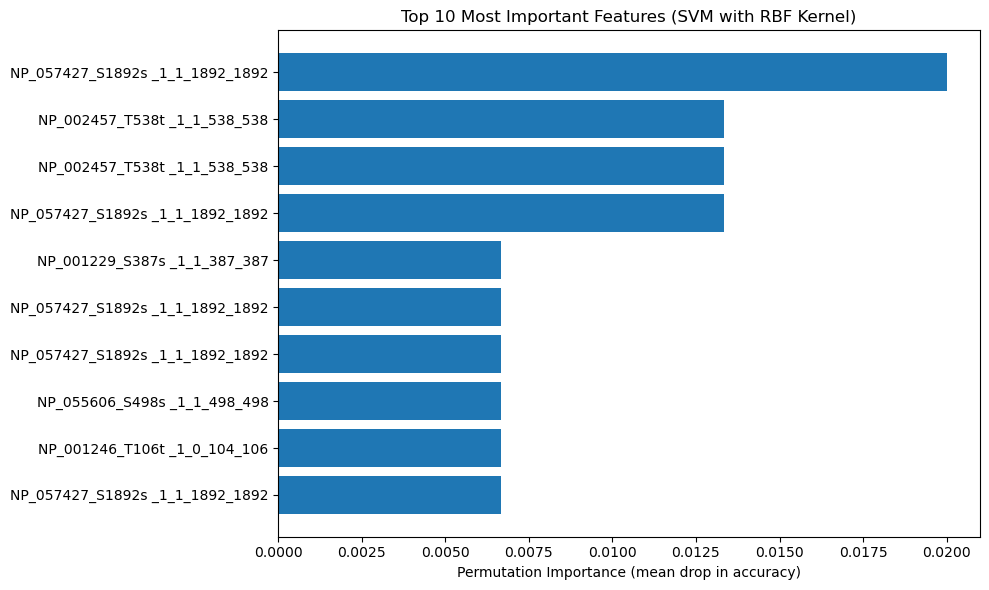

In [134]:
#running permutation importance with SVM again:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Run permutation importance on the test set
result = permutation_importance(
    phospho_svm_pam50, X_test, y_test, n_repeats=10,
    scoring='accuracy', random_state=42, n_jobs=-1
)

# Extract importance scores and feature names
importances = result.importances_mean
feature_names = phospho_data_PAM50.columns

# Plot top N features
top_n = 10
top_idx = np.argsort(importances)[-top_n:]

plt.figure(figsize=(10, 6))
plt.barh(range(top_n), importances[top_idx])
plt.yticks(range(top_n), feature_names[top_idx])
plt.xlabel("Permutation Importance (mean drop in accuracy)")
plt.title("Top 10 Most Important Features (SVM with RBF Kernel)")
plt.tight_layout()
plt.show()


as we can see from the graph above, there are a lot of features that are repeats. 

057427 = Centromere protein F

002457 = Myb-related protein B